# Дипломный проект

Тема: "Предсказание уровня адаптации студентов в онлайн-образованию" <br>
Выполнила: Селедкова Кристина

**Описание задачи**

Цель - предсказать уровень адаптивности студендов 

Зачем?  

Повысить вероятность окончания курса студентом

In [14]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [61]:
# 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# 3. Модели
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay

In [2]:
matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

**План работы**
* [1. Загрузка данных](#load)
* [2. Работа с типами данных](#types)
* [3. Визуализация данных](#visual)
* [4. Перекодированние](#decode)
* [5. Разбиение на train / test](#split)
* [6. Linear Regression](#linear)
* [7. Decision tree](#decision_tree)
* [8. Random forest](#random_forest)
* [9. XGBClassifier](#XGBClassifier)
* [10. Заключение](#conclusion)

In [3]:
DATASET_PATH = './students_adaptability_level_online_education.csv'
PREPARED_DATASET_PATH = './date_prepared.csv'

### 1. Загрузка данных <a class='anchor' id='load'>

**Описание датасета**

Уровень адаптации учащихся в онлайн-образовании.

* **Adaptivity level** - целевая переменная, уровень адаптивности
* **Gender** - пол
* **Age** - возраст
* **Education Level** - уровень образования
* **Institution Type** - тип учреждения
* **IT Student** - студент обучается на IT прогремме
* **Location in Town** - расположение в городе
* **Load-shedding** - сброс нагрузки ??
* **Financial Condition** - финансовое состояние
* **Internet Type** - тип интернета
* **Network Type** - тип сети
* **Class Duration** - продолжительность занятий
* **Self LMS** - самостоятеотное LMS
* **Device** - устройства, с которых смотрят курс

In [4]:
df = pd.read_csv(DATASET_PATH, sep=',')
df.head(10)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
5,Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
6,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,0,No,Mobile,Low
7,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
8,Boy,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
9,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate


### 2. Проверка данных (типы и пропуски)<a class='anchor' id='types'>

In [5]:
df.info() #посмотрим на типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


Датасет состоит из 1205 строк с типом данных Object или String. Предполагается, что все независимые переменные являются категориальными признаками.

In [6]:
df.isna().sum() #проверим наличие пропусков

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

Пропуски отсутсвуют

In [7]:
df.isnull().sum() #проверим количество нулевых значений

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

Нулевые значения отсутсвуют 

In [8]:
df.describe().T #посмотрим на статистику

,count,unique,top,freq
Gender,1205,2,Boy,663
Age,1205,6,21-25,374
Education Level,1205,3,School,530
Institution Type,1205,2,Non Government,823
IT Student,1205,2,No,901
Location,1205,2,Yes,935
Load-shedding,1205,2,Low,1004
Financial Condition,1205,3,Mid,878
Internet Type,1205,2,Mobile Data,695
Network Type,1205,3,4G,775


Поскольку все столбцы данных являются категориальными, мы видим количество уникальных значений по переменным, самое популярное значение и частоту встречающегося популярног значения

### 3. Визуализация данных<a class='anchor' id='visual'>

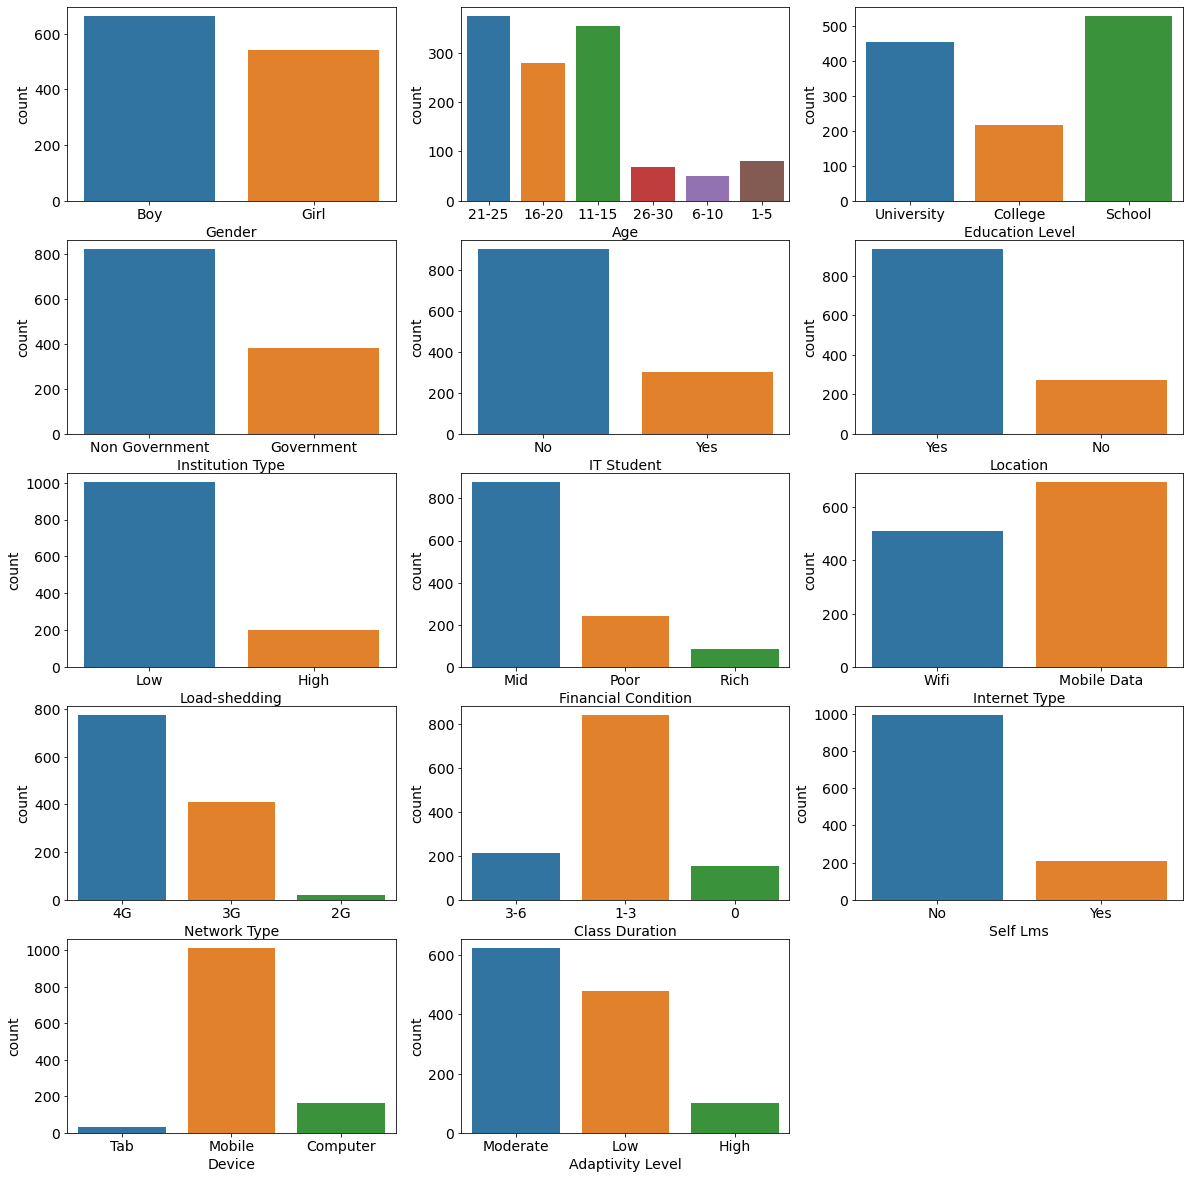

In [9]:
i = 1
plt.figure(figsize = (20,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = df)
    i +=1

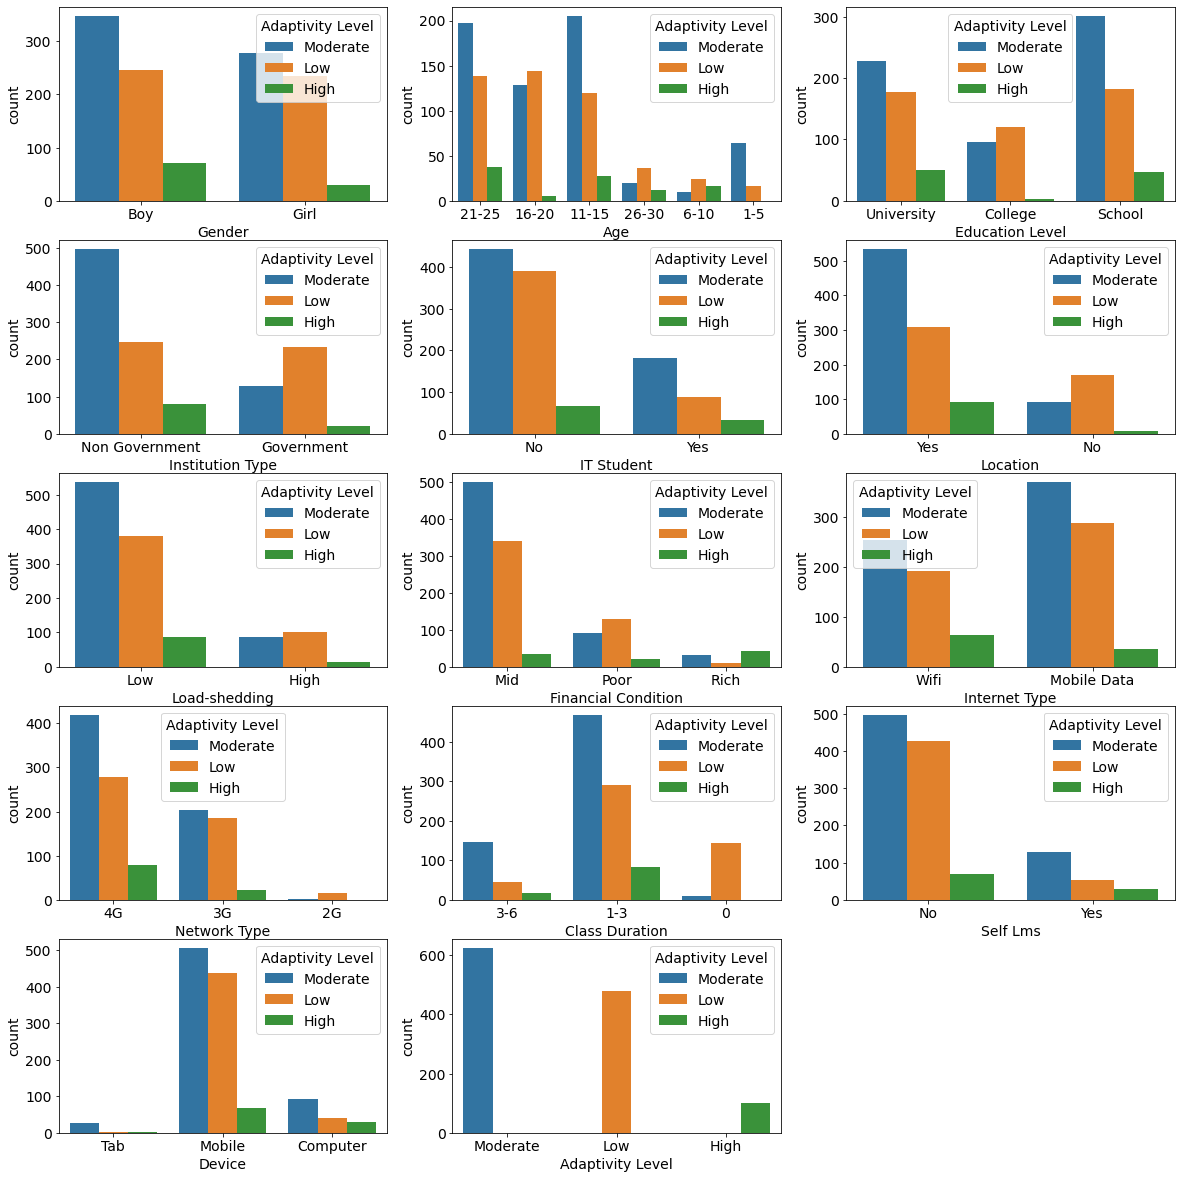

In [10]:
i = 1
plt.figure(figsize = (20,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = df)
    i +=1

### 4. Перекодированние данных <a class='anchor' id='decode'>

Преобразуем все переменные в числовые. Испольуем One hot encoding. <br>
Прекодировка адаптивности: 0 - низка, 1 - умеренная, 2 - высокая.

In [11]:
onehotencoded_df = pd.get_dummies(df, columns = ['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device']) 
onehotencoded_df['Adaptivity Level']=onehotencoded_df['Adaptivity Level'].map({'Moderate':1,'Low':0,'High':2})  # label encode for predictor only
onehotencoded_df.head()  # 36 columns 

,Adaptivity Level,Gender_Boy,Gender_Girl,Age_1-5,Age_11-15,Age_16-20,Age_21-25,Age_26-30,Age_6-10,Education Level_College,...,Network Type_3G,Network Type_4G,Class Duration_0,Class Duration_1-3,Class Duration_3-6,Self Lms_No,Self Lms_Yes,Device_Computer,Device_Mobile,Device_Tab
0,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,1,0,1,0,0,1,0,0,0,1,...,0,1,0,1,0,1,0,0,1,0
3,1,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0


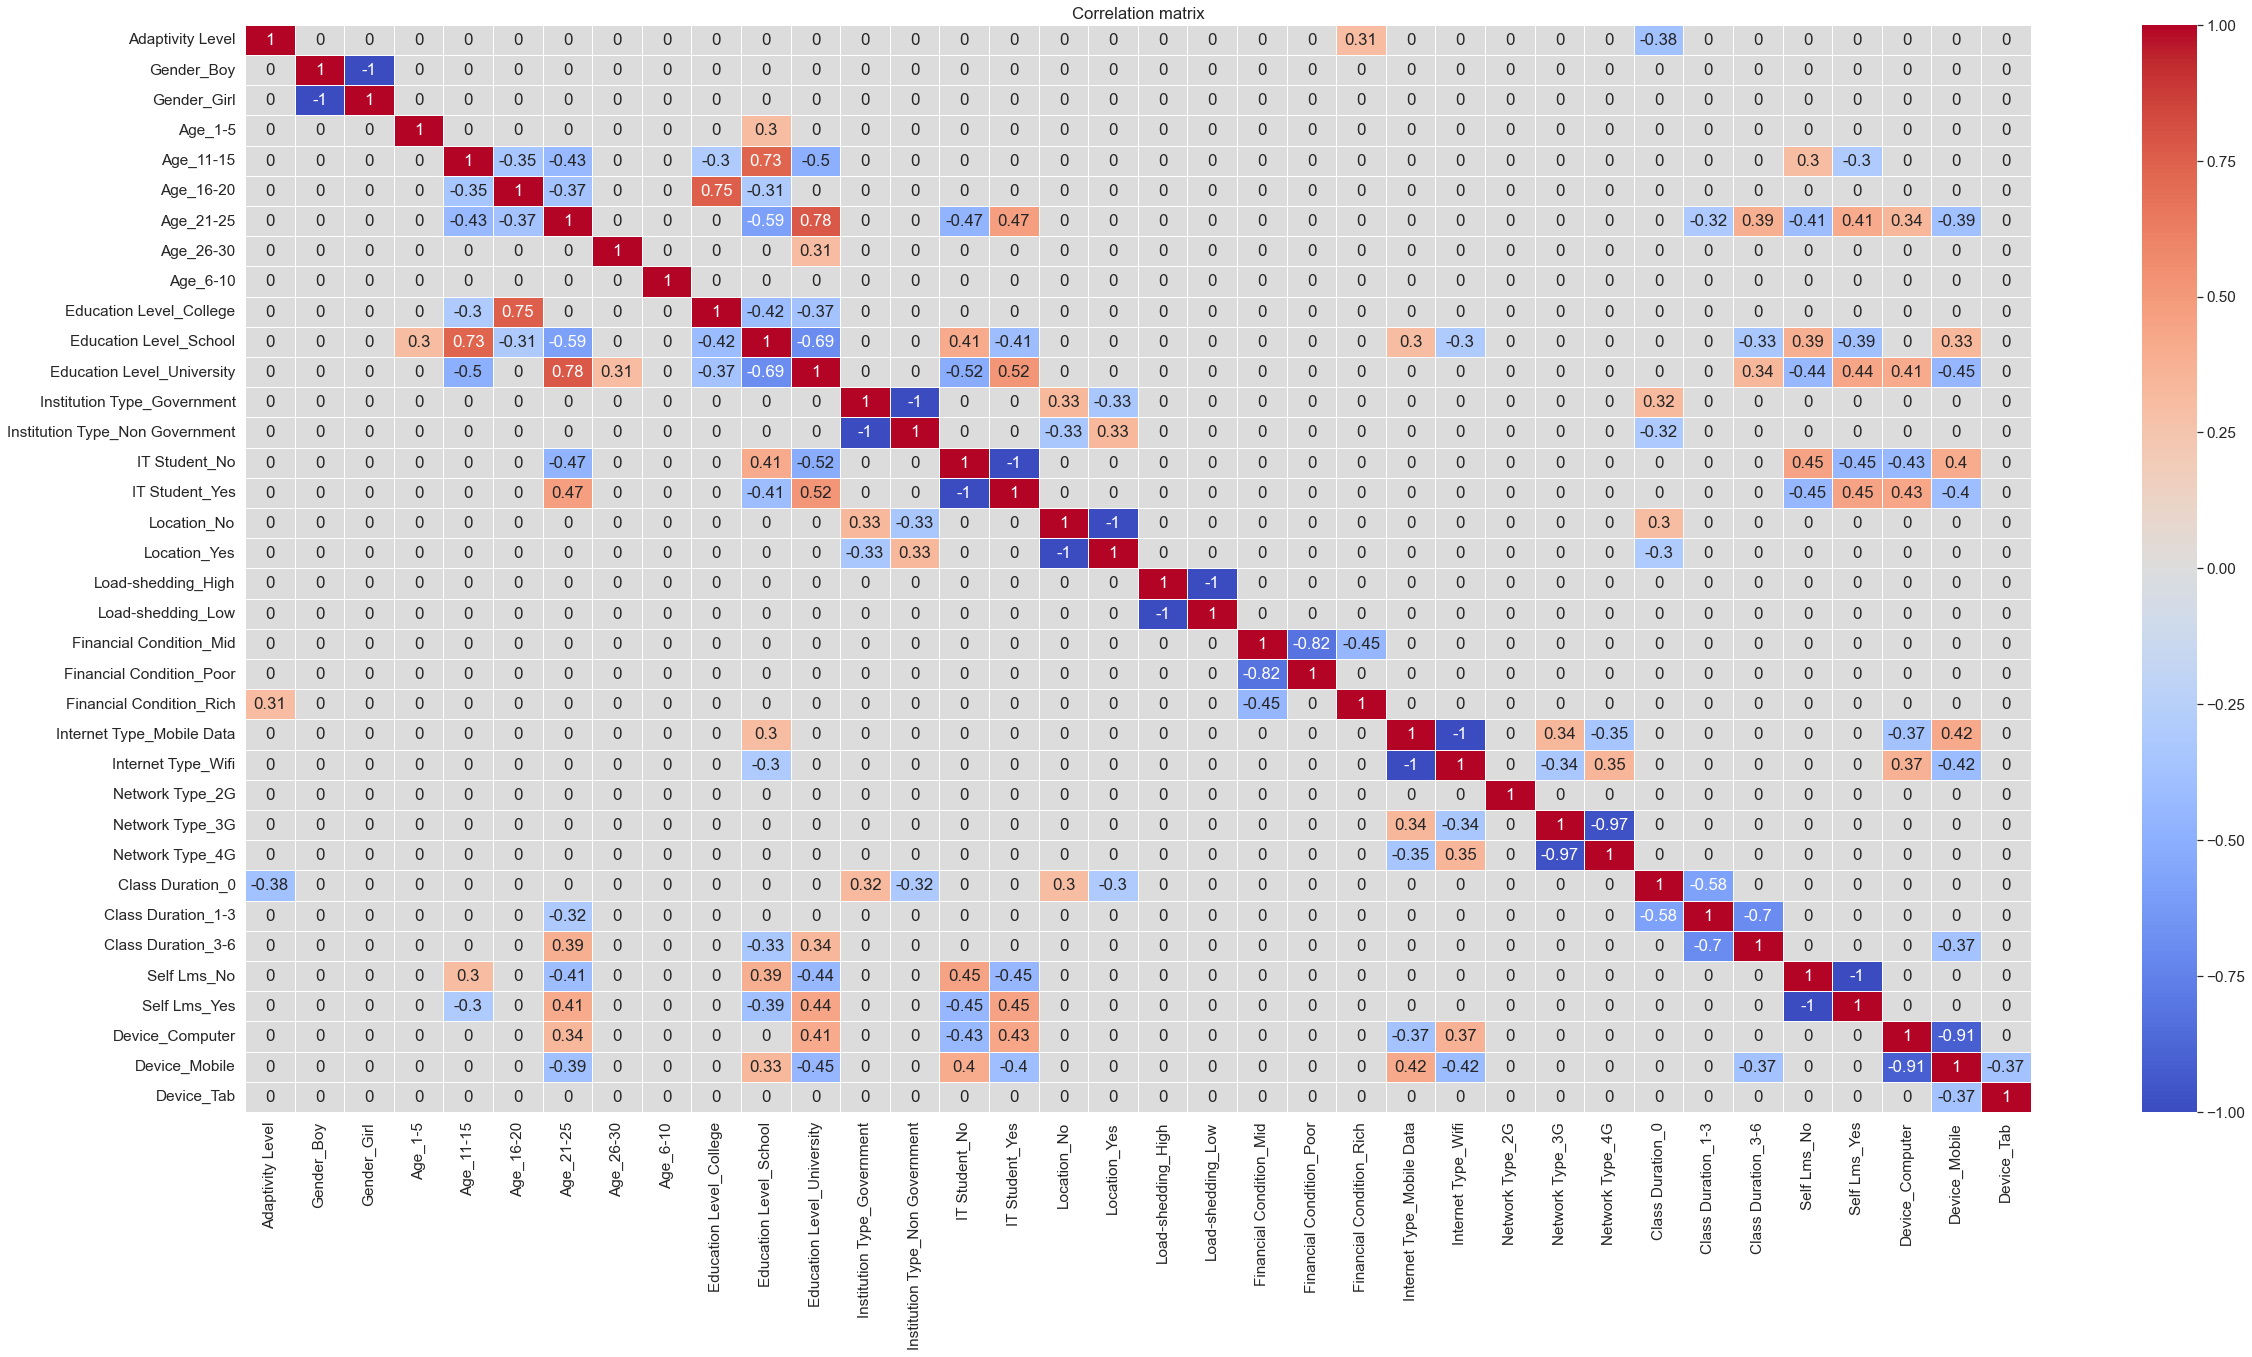

In [12]:
plt.figure(figsize = (40,20))

sns.set(font_scale=1.4)

corr_matrix = onehotencoded_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Судя по матрице корреляции - наибольший вклад в адаптивность студента вносит длительность класса (отсутсвие часов вносит отрицательный вклад) и финансовое состояние стунда (у кого благостотояние выше, те леучше адаптируются)

### 5. Разбиение на train / test <a class='anchor' id='split'>

In [26]:
X=onehotencoded_df.iloc[:,1:]
y=onehotencoded_df.iloc[:,:1]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### 6. Linear Regression  <a class='anchor' id='linear'>

In [58]:
logit=LogisticRegression(C=10, penalty='l2', solver='lbfgs')
logit.fit(X_train, y_train)
y_pred=logit.predict(X_test)

y_true = y_test # True values

# Measure accuracy
print("Train accuracy:", np.round(accuracy_score(y_train, logit.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

print(classification_report(y_true, y_pred, zero_division=1))

Train accuracy: 0.72
Test accuracy: 0.68
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       154
           1       0.64      0.81      0.71       169
           2       0.72      0.33      0.46        39

    accuracy                           0.68       362
   macro avg       0.70      0.59      0.61       362
weighted avg       0.69      0.68      0.67       362



Довольно низкие показатели, данную модель испольуем как отправную точку

### 7. Decision tree  <a class='anchor' id='decision_tree'>

In [59]:
dtree1 = DecisionTreeClassifier(random_state=42)
dtree1 = dtree1.fit(X_train, y_train)
dtpred1 = dtree1.predict(X_test)

# Measure accuracy
print("Train accuracy:", np.round(accuracy_score(y_train, logit.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_test, dtpred1), 2))

print(classification_report(y_test, dtpred1, zero_division=1))

Train accuracy: 0.72
Test accuracy: 0.88
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       154
           1       0.86      0.92      0.89       169
           2       0.84      0.69      0.76        39

    accuracy                           0.88       362
   macro avg       0.87      0.84      0.85       362
weighted avg       0.88      0.88      0.88       362



Точно увеличиласть до 89%. Построим дерево признаков

Приведем модель с гиперпараметрами

In [47]:
tuned_dt_model= DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    max_features='auto',
    max_leaf_nodes=None,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    splitter='best',
    random_state=42)

tuned_dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=42)

In [48]:
dt_tuned_pred =tuned_dt_model.predict(X_test)

print(classification_report(y_test, dt_tuned_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       154
           1       0.86      0.92      0.89       169
           2       0.88      0.72      0.79        39

    accuracy                           0.88       362
   macro avg       0.88      0.84      0.86       362
weighted avg       0.88      0.88      0.88       362



Модель показывает лучшие результаты по recall, и незначительные улучшения по f1-score и precision. В целом удается объяснить 88% результатов

### 8. Random forest  <a class='anchor' id='random_forest'>

In [60]:
rf1 = RandomForestClassifier(random_state=42)
rf1 = rf1.fit(X_train, y_train.values.ravel())
rf_pred1 = rf1.predict(X_test)

# Measure accuracy
print("Train accuracy:", np.round(accuracy_score(y_train, logit.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_test, rf_pred1), 2))

print(classification_report(y_test, rf_pred1, zero_division=1))

Train accuracy: 0.72
Test accuracy: 0.89
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       154
           1       0.87      0.92      0.90       169
           2       0.87      0.69      0.77        39

    accuracy                           0.89       362
   macro avg       0.89      0.84      0.86       362
weighted avg       0.89      0.89      0.89       362



В целом, модель показывает схожие результаты, объянено 89%

### 9. XGBClassifier  <a class='anchor' id='XGBClassifier'>

In [63]:
XGB = XGBClassifier(random_state=0)
XGB = XGB.fit(X_train, y_train.values.ravel())
XGB_pred1 = XGB.predict(X_test)

# Measure accuracy
print("Train accuracy:", np.round(accuracy_score(y_train, logit.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_test, XGB_pred1), 2))

print(classification_report(y_test, XGB_pred1, zero_division=1))

Train accuracy: 0.72
Test accuracy: 0.89
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       154
           1       0.85      0.95      0.90       169
           2       0.88      0.72      0.79        39

    accuracy                           0.89       362
   macro avg       0.89      0.85      0.87       362
weighted avg       0.90      0.89      0.89       362



### 10. Заключение  <a class='anchor' id='conclusion'>

По всем метрикам - наилучший результат показала модель Random forest  - ее и стоит брать за основу и развивать дальше. В дальнейшем, планируется использовать модель на более расширенных данных и ианализ гиперпараметров на большем числе данных

Зачем проводить подобный анализ бизнесу. В идеале, помогать студентам, которые находится в зоне риска (низкий уровень адаптации) лучше адаптироваться и доходить обучение до конца